In [2]:
import pickle 
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def rolling(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [171]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/a_s.pickle", "rb"))

cyc_dmala_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/energies.pickle", "rb"))
cyc_dmala_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/hops.pickle", "rb"))
cyc_dmala_burnin_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/a_s.pickle", "rb"))

cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


dmala_energies = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/energies.pickle", "rb"))
dmala_hops = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/hops.pickle", "rb"))

dula_energies = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/energies.pickle", "rb"))
dula_hops = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/hops.pickle", "rb"))

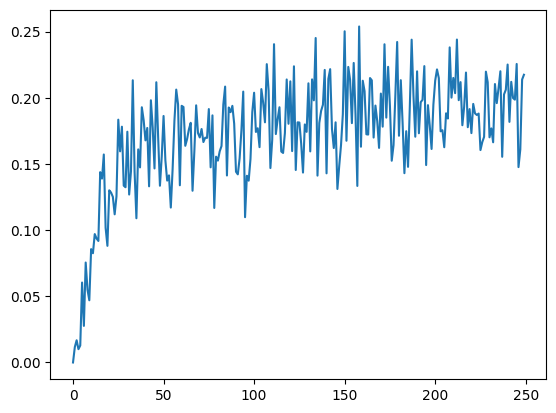

In [172]:
a_s_means = [cyc_dmala_a_s[(i)*20 + 0] for i in range(250)]
plt.plot(a_s_means)

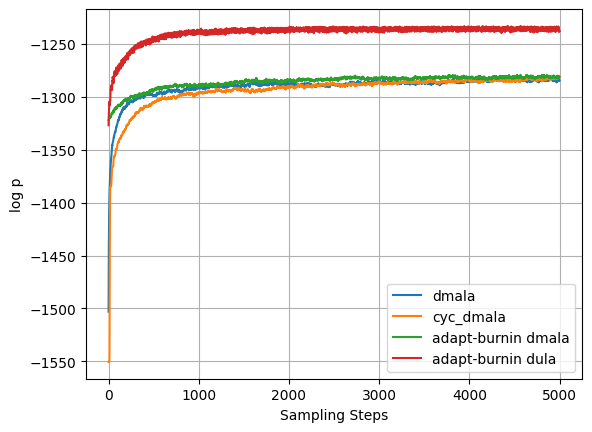

In [173]:
plt.plot(dmala_energies, label="dmala")
plt.plot(cyc_dmala_energies, label="cyc_dmala")
plt.plot(cyc_dmala_burnin_energies, label="adapt-burnin dmala")
plt.plot(cyc_dula_burnin_energies, label="adapt-burnin dula")
plt.ylabel("log p")
plt.xlabel("Sampling Steps")
plt.grid()
plt.legend()



Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 0')

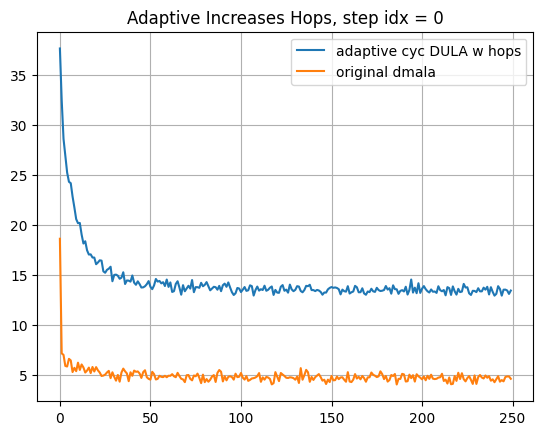

In [174]:
step_num = 0
plt.plot(cyc_dula_burnin_hops[step_num::20], label='adaptive cyc DULA w hops')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 18')

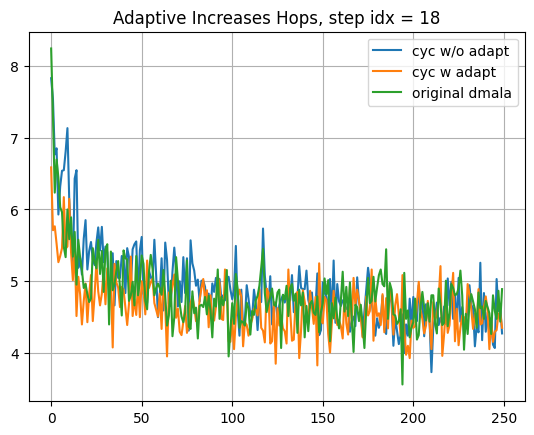

In [178]:
step_num = 18
plt.plot(cyc_dmala_hops[step_num::20], label='cyc w/o adapt')
plt.plot()
plt.plot(cyc_dmala_burnin_hops[step_num::20], label='cyc w adapt')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

In [179]:
# calculating average hops per cycle 
total_hops = []
for hops in [cyc_dmala_hops, cyc_dmala_burnin_hops, dmala_hops]:
    temp_hops = []
    for i in range(len(cyc_dmala_hops) // 20): 
        h_mean = np.mean(hops[(i) * 20 : (i + 1)*20])
        temp_hops.append(h_mean)
    total_hops.append(temp_hops)
        

Text(0.5, 0, 'cycle number')

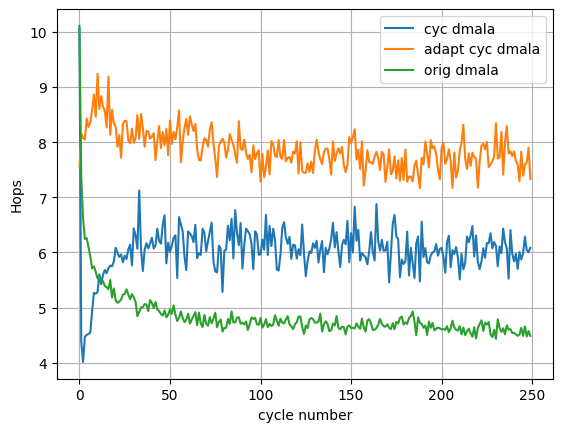

In [183]:
temp_names = ['cyc dmala', 'adapt cyc dmala', 'orig dmala']
for i, hops in enumerate(total_hops):
    plt.plot(hops, label=temp_names[i])
plt.legend()
plt.grid()
plt.ylabel("Hops")
plt.xlabel("cycle number")

In [38]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/a_s.pickle", "rb"))



In [194]:
burnin_res = pickle.load(open("figs/ebm_sample/dmala_alpha_max_budget_10000_adapt_burnin_lr_0.1/burnin_res.pickle", "rb"))

In [195]:
burnin_res

{'step-adapt-hist': {'a_s': [1.3836986818975718e-09,
   1.7483746128902273e-09,
   2.8328319149944383e-07,
   1.407806315845355e-08,
   4.514753392733434e-08,
   1.4191349363345867e-08,
   2.180389742286251e-09,
   1.3055358615444084e-08,
   1.4788061471168818e-08,
   9.075903247415029e-09,
   6.869549823248927e-07,
   4.106668692313346e-05,
   0.00014345821484298307,
   2.6935134231244695e-08,
   2.1270729591709568e-08,
   1.1893111759895515e-08,
   3.710842855507243e-08,
   3.0390950595232267e-07,
   1.7041409868806167e-06,
   5.606160486649331e-09,
   6.24072369073036e-09,
   1.504207089562151e-09,
   1.9744164960495077e-07,
   5.9336451241788636e-08,
   2.0871058780031716e-09,
   4.324234450218761e-09,
   1.1917291114861022e-07,
   7.798523924752039e-08,
   6.426792631185004e-08,
   1.6823048498714573e-08,
   3.771102139823872e-10,
   1.0370279802143888e-08,
   3.336329226798789e-09,
   3.3988131401372333e-10,
   1.730986567837706e-08,
   5.511567473722784e-10,
   9.993517267219221

In [76]:
cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


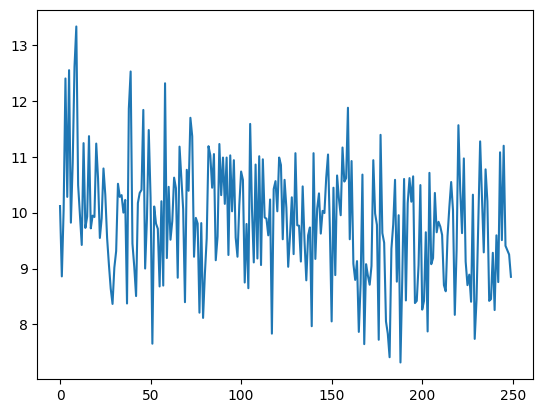

In [75]:
plt.plot(cyc_dmala_burnin_hops[0::20])

In [70]:
cyc_dula_burnin_res = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.5/burnin_res.pickle", "rb"))
cyc_dula_burnin_res

{'step-adapt-hist': {'a_s': [3.6250897344645897e-09,
   1.9941778029887714e-09,
   1.0908625095528655e-08,
   0.00011624304273465161,
   1.29679554145394e-08,
   2.170343103464319e-09,
   3.1237372323862893e-10,
   8.80882484207744e-09,
   4.4296826705425735e-10,
   6.089875886740374e-09,
   2.1380362098908077e-12,
   5.351466200499795e-12,
   9.082919674369807e-11,
   1.2699254240457137e-11,
   1.3463605222967676e-11,
   1.904810376187067e-11,
   1.7768719462084734e-09,
   9.962799619665012e-11,
   1.0042727125638275e-10,
   3.771499555928606e-11,
   1.2777268873827831e-11,
   1.1761331641541983e-11,
   8.01346908157279e-15,
   2.0412709639109278e-15,
   1.5838970785948534e-13],
  'hops': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'alpha_max': [13.85929291125633,
   9.701505063000024,
   6.79105355377328,
   4.753737524681824,
  

In [81]:
digit_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.9/digit_energies.pickle", "rb"))

Text(0.5, 0, 'Digits')

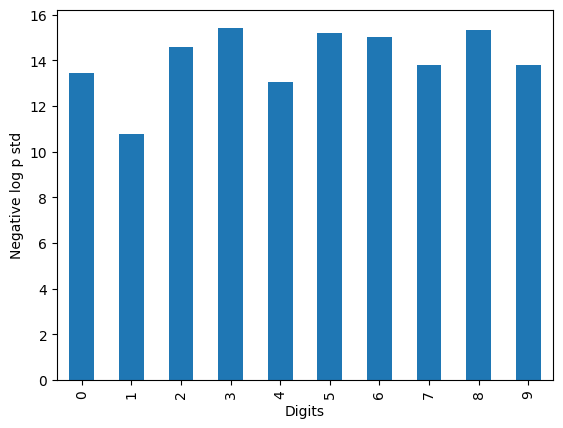

In [143]:
import pandas as pd
summary_df = pd.DataFrame()
df = pd.DataFrame(digit_energies)
summary_df['Log p mean'] = df.groupby('values').apply('mean')
summary_df['Log p std'] = df.groupby('values').apply('std')
graph = (summary_df['Log p std']).plot.bar()
graph.set_ylim(0)
graph.set_ylabel("Negative log p std")
graph.set_xlabel("Digits")

# graph.legend()
# graph.grid()
# graph

<Axes: xlabel='values'>

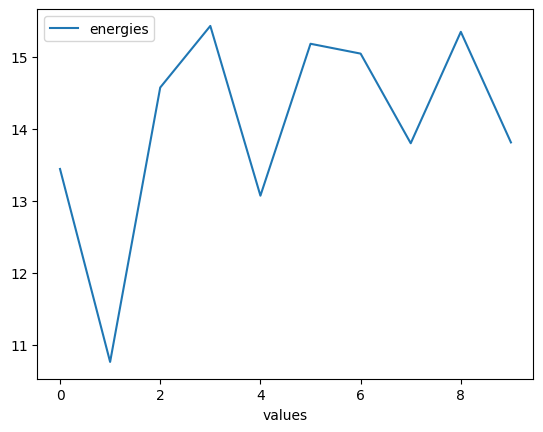

In [111]:
df.groupby('values').apply('std').plot()

In [96]:
sample_var1 = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/sample_var.pickle", "rb"))

In [97]:
sample_var2 = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/sample_var.pickle", "rb"))

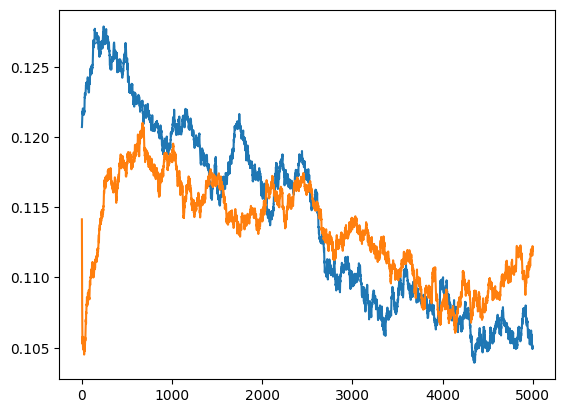

In [98]:
plt.plot(sample_var1, label="acdlp")
plt.plot(sample_var2, label="dlp")


In [155]:
step_size = 1.0
bal = .7
np.mean(pickle.load(open(f"figs/ebm_sample/dmala_stepsize_{str(step_size)}_{str(bal)}/a_s.pickle", "rb")))

0.3180866759832948

In [186]:
a_s = pickle.load(open("figs/ebm_sample/dmala_use_big/a_s.pickle", "rb"))



In [187]:
np.mean(a_s)

1.8678081759510281e-10